<a href="https://colab.research.google.com/github/avishek-astra/Deep-Learning/blob/main/fixedanddynamiclearningrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# make equation look nicer
from IPython.display import display,set_matplotlib_formats
set_matplotlib_formats('svg')

<ipython-input-38-c4b310eb1142>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [55]:
#define a range for x
x=np.linspace(-2,2,2001)

#gradient descent in 1D
def fx(x):
  return 3*x**2-3*x+4
#derivative function
def deriv(x):
  return 6*x-3


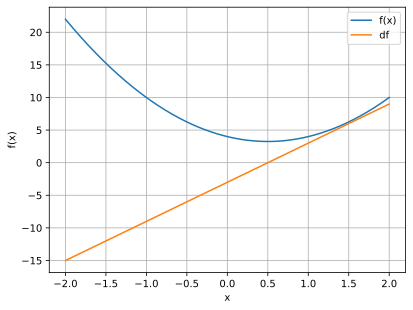

In [56]:
#plot the function and its derivative
#plotting
plt.plot(x,fx(x),x,deriv(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df'])
plt.show()


G.D using a fixed learning rate


In [63]:
#random starting point
localmin=np.random.choice(x,1)
initval=localmin[:]


#learning parameters-
learning_rate=.01
training_epochs=50
#run through training and store all the results
modelparamsFixed=np.zeros((training_epochs,3))
for i in range(training_epochs):
  #compute gradient
  grad=deriv(localmin)
  #nonadaptive learning
  lr=learning_rate
  #update local minimum
  localmin=localmin-lr*grad
  modelparamsFixed[i,:]=localmin.item(),grad.item(),lr

G.D using a gradient_based learning rate


In [64]:
#random starting point
localmin=np.random.choice(x,1)
initval=localmin[:]

#learning parameters-
learning_rate=.01
training_epochs=50
#run through training and store all the results
modelparamsGrad=np.zeros((training_epochs,3))
for i in range(training_epochs):
  #compute gradient
  grad=deriv(localmin)
  #nonadaptive learning
  lr=learning_rate*np.abs(grad)
  #update local minimum
  localmin=localmin-lr*grad
  #store the parameters
  modelparamsGrad[i,:]=localmin.item(),grad.item(),lr.item()

In [65]:
#store the model parameters and outputs on each iteration

G.D using a time based learning rate


In [68]:

#redefining parameters
learning_rate=.01
localmin=initval
#setting threshold
#run through traing and store all the results
modelparamsTime=np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad=deriv(localmin)
  lr=learning_rate*(1-(i+1)/training_epochs)
  localmin= localmin-lr*grad
  # The problem was grad had more than one element, so using grad.item() to take the scalar value
  modelparamsTime[i,:]=localmin.item(),grad.item(),lr


PLOT THE RESULT

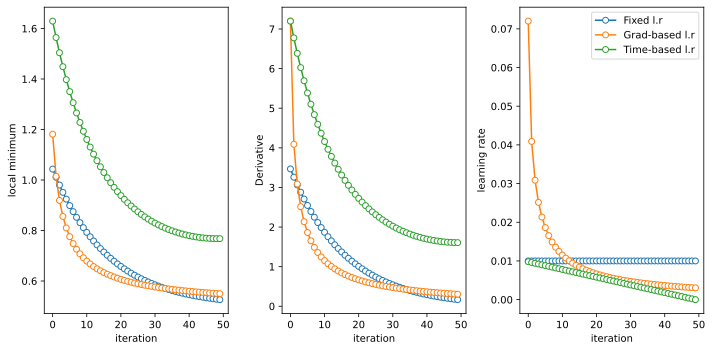

In [69]:

#plot the gradient over iterations
fig,ax=plt.subplots(1,3,figsize=(10,5))
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('iteration')

ax[0].set_ylabel('local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('learning rate')
ax[2].legend(['Fixed l.r','Grad-based l.r','Time-based l.r'])
plt.tight_layout()
plt.show()